In [1]:
#importing Required library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline





In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In D:\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.jpeg_quality rcparam was deprecated in Matplo

In [2]:
#importing plotly Library
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True) #Turning on notebook mode 
cf.go_offline()

In [3]:
#importing the datase

df=pd.read_csv("zomato.csv")
df.head()

url  ... listed_in(city)
0  https://www.zomato.com/bangalore/jalsa-banasha...  ...    Banashankari
1  https://www.zomato.com/bangalore/spice-elephan...  ...    Banashankari
2  https://www.zomato.com/SanchurroBangalore?cont...  ...    Banashankari
3  https://www.zomato.com/bangalore/addhuri-udupi...  ...    Banashankari
4  https://www.zomato.com/bangalore/grand-village...  ...    Banashankari

[5 rows x 17 columns]

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
del df["url"]
del df["address"]
del df["phone"]

In [7]:
# Duplicates values
df.duplicated().sum()

63

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
#checking the NaN values
df.isnull().sum()


name                               0
online_order                       0
book_table                         0
rate                            7760
votes                              0
location                          21
rest_type                        227
dish_liked                     28027
cuisines                          45
approx_cost(for two people)      345
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

<AxesSubplot:>

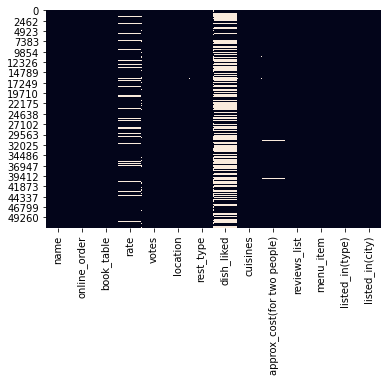

In [10]:
sns.heatmap(df.isnull(), cbar=False)

In [11]:
del df["dish_liked"]

In [12]:
df.dropna(how='any',inplace=True)
 

In [13]:
#checking the NaN values
df.isnull().sum()


name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

<AxesSubplot:>

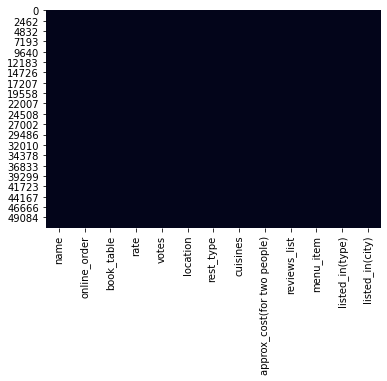

In [14]:
sns.heatmap(df.isnull(), cbar=False)

In [15]:
#Reading Column Names
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'approx_cost(for two people)', 'reviews_list',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [16]:
#Changing the column names
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'cuisines', 'cost', 'reviews_list', 'menu_item', 'type',
       'city'],
      dtype='object')

In [17]:
df.head()

name online_order book_table  ... menu_item    type          city
0                  Jalsa          Yes        Yes  ...        []  Buffet  Banashankari
1         Spice Elephant          Yes         No  ...        []  Buffet  Banashankari
2        San Churro Cafe          Yes         No  ...        []  Buffet  Banashankari
3  Addhuri Udupi Bhojana           No         No  ...        []  Buffet  Banashankari
4          Grand Village           No         No  ...        []  Buffet  Banashankari

[5 rows x 13 columns]

In [18]:
df.cost.unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
       '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
       '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
       '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
       '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
       '4,500'], dtype=object)

In [19]:
#Some Transformations
df['cost'] = df['cost'].astype(str) #Changing the cost to string
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost
df['cost'] = df['cost'].astype(float) # Changing the cost to Float
df.info() # looking at the dataset information after transformation

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43486 entries, 0 to 51716
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          43486 non-null  object 
 1   online_order  43486 non-null  object 
 2   book_table    43486 non-null  object 
 3   rate          43486 non-null  object 
 4   votes         43486 non-null  int64  
 5   location      43486 non-null  object 
 6   rest_type     43486 non-null  object 
 7   cuisines      43486 non-null  object 
 8   cost          43486 non-null  float64
 9   reviews_list  43486 non-null  object 
 10  menu_item     43486 non-null  object 
 11  type          43486 non-null  object 
 12  city          43486 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 4.6+ MB


In [20]:
df

name online_order book_table  ... menu_item           type          city
0                                                  Jalsa          Yes        Yes  ...        []         Buffet  Banashankari
1                                         Spice Elephant          Yes         No  ...        []         Buffet  Banashankari
2                                        San Churro Cafe          Yes         No  ...        []         Buffet  Banashankari
3                                  Addhuri Udupi Bhojana           No         No  ...        []         Buffet  Banashankari
4                                          Grand Village           No         No  ...        []         Buffet  Banashankari
...                                                  ...          ...        ...  ...       ...            ...           ...
51709                         The Farm House Bar n Grill           No         No  ...        []  Pubs and bars    Whitefield
51711                                            Bhagini           No         No  ...        []  Pubs and bars    Whitefield
51712  Best Brews - Four Points by Sheraton Bengaluru...           No         No  ...        []  Pubs and bars    Whitefield
51715  Chime - Sheraton Grand Bengaluru Whitefield Ho...           No        Yes  ...        []  Pubs and bars    Whitefield
51716                       The Nest - The Den Bengaluru           No         No  ...        []  Pubs and bars    Whitefield

[43486 rows x 13 columns]

In [21]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [22]:
#Removing '/5' from Rates
df = df.loc[df.rate !='NEW']
df = df.loc[df.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head() # looking at the dataset after transformation

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41226 entries, 0 to 41225
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          41226 non-null  object 
 1   online_order  41226 non-null  object 
 2   book_table    41226 non-null  object 
 3   rate          41226 non-null  float64
 4   votes         41226 non-null  int64  
 5   location      41226 non-null  object 
 6   rest_type     41226 non-null  object 
 7   cuisines      41226 non-null  object 
 8   cost          41226 non-null  float64
 9   reviews_list  41226 non-null  object 
 10  menu_item     41226 non-null  object 
 11  type          41226 non-null  object 
 12  city          41226 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 4.1+ MB


<AxesSubplot:ylabel='online_order'>

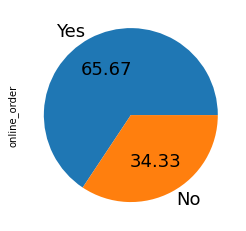

In [24]:
df.online_order.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

<AxesSubplot:ylabel='book_table'>

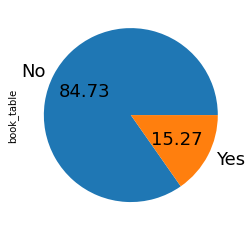

In [25]:
df.book_table.value_counts().plot.pie(fontsize = 18, autopct = '%.2f')

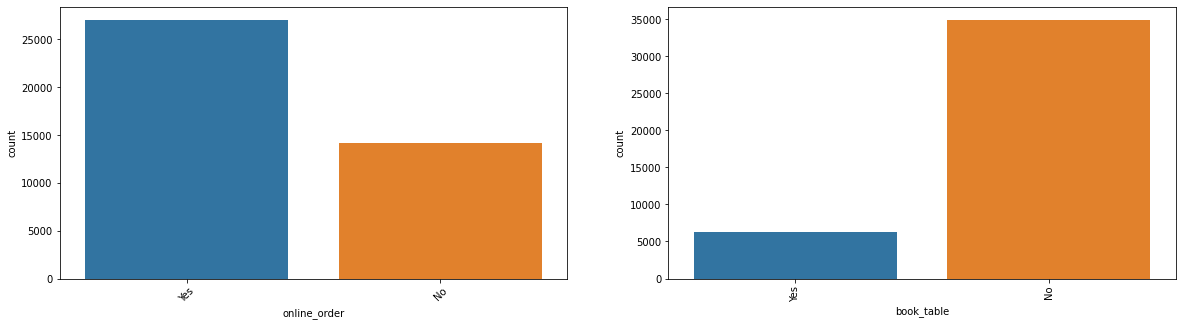

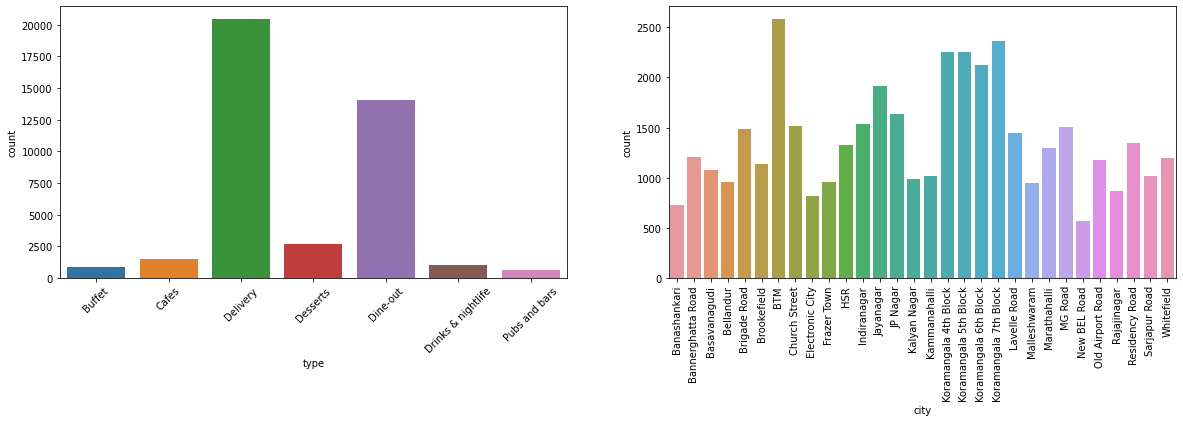

In [26]:
cat_cols = ['online_order','book_table','type','city']
i=0
while i < 4:
    fig = plt.figure(figsize=[20,5])
    
    
    
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=45)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    plt.xticks(rotation=90)
    i += 1
    
    plt.show()

# Largest Food Chain in Bangalore 

In [27]:
df.name.value_counts().head(30).iplot(kind="bar")

# Most Popular Restaurant types 

In [28]:
df.rest_type.value_counts().head(30).iplot(kind="bar")

In [29]:
df.describe()

rate         votes          cost
count  41226.000000  41226.000000  41226.000000
mean       3.702091    352.863217    603.961238
std        0.440063    884.509575    464.985064
min        1.800000      0.000000     40.000000
25%        3.400000     21.000000    300.000000
50%        3.700000     73.500000    500.000000
75%        4.000000    278.000000    750.000000
max        4.900000  16832.000000   6000.000000

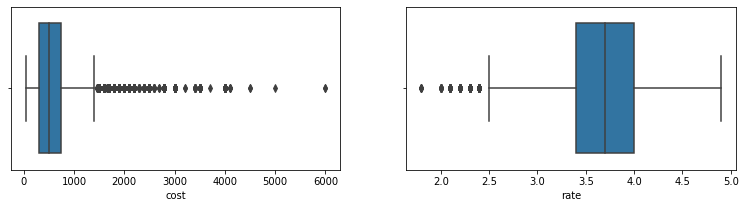

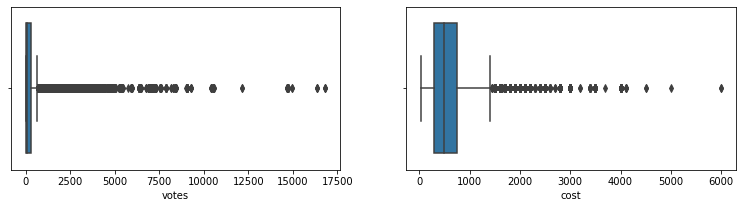

In [30]:
num_cols = ['cost','rate','votes','cost']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    #ax1 = fig.add_subplot(121)
    #ax2 = fig.add_subplot(122)
    
    #ax1.title.set_text(num_cols[i])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    #ax2.title.set_text(num_cols[i])
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

# Expensive Restaurants in Bangalore

In [37]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df[df.cost>2500].sort_values(ascending=False,by="cost")

name online_order  \
15114             Le Cirque Signature - The Leela Palace           No   
36363             Le Cirque Signature - The Leela Palace           No   
32048                         Royal Afghan - ITC Windsor           No   
33105                             Malties - Radisson Blu           No   
33520                             Malties - Radisson Blu           No   
32044                         La Brasserie - Le Meridien           No   
31310                         La Brasserie - Le Meridien           No   
31069                         La Brasserie - Le Meridien           No   
29903                         La Brasserie - Le Meridien           No   
10269                        Grill 99 - The Ritz-Carlton           No   
5410                            Riwaz - The Ritz-Carlton           No   
38501                       Alba - JW Marriott Bengaluru           No   
38428                        Grill 99 - The Ritz-Carlton           No   
38405                           Riwaz - The Ritz-Carlton           No   
34484                       Alba - JW Marriott Bengaluru           No   
10647                           Riwaz - The Ritz-Carlton           No   
38537                Edo Restaurant & Bar - ITC Gardenia           No   
34529                Edo Restaurant & Bar - ITC Gardenia           No   
34533                           Riwaz - The Ritz-Carlton           No   
36356                         Jamavar - The Leela Palace           No   
10057                       Alba - JW Marriott Bengaluru           No   
10429                     Masala Klub - The Taj West End           No   
10101                Edo Restaurant & Bar - ITC Gardenia           No   
35018                           Riwaz - The Ritz-Carlton           No   
34683                        Grill 99 - The Ritz-Carlton           No   
5114                         Grill 99 - The Ritz-Carlton           No   
15096                         Jamavar - The Leela Palace           No   
32060               Dum Pukht Jolly Nabobs - ITC Windsor           No   
31255                           Riwaz - The Ritz-Carlton           No   
30738                     Masala Klub - The Taj West End           No   
30737                           Riwaz - The Ritz-Carlton           No   
30733                Edo Restaurant & Bar - ITC Gardenia           No   
30917                        Grill 99 - The Ritz-Carlton           No   
4907                        Alba - JW Marriott Bengaluru           No   
10115                           Riwaz - The Ritz-Carlton           No   
4952                 Edo Restaurant & Bar - ITC Gardenia           No   
4956                            Riwaz - The Ritz-Carlton           No   
32056                              Dakshin - ITC Windsor           No   
32070                Baluchi - The Lalit Ashok Bangalore           No   
10117  The Lantern Restaurant & Bar - The Ritz-Carlto...           No   
34519                    Kebabs & Kurries - ITC Gardenia           No   
30722                    Kebabs & Kurries - ITC Gardenia           No   
34553  The Lantern Restaurant & Bar - The Ritz-Carlto...           No   
30656                      Karavalli - The Gateway Hotel           No   
35621                          Citrus - The Leela Palace           No   
36355                          Citrus - The Leela Palace           No   
10013                      Karavalli - The Gateway Hotel           No   
4974   The Lantern Restaurant & Bar - The Ritz-Carlto...           No   
36364                             Zen - The Leela Palace           No   
4858                       Karavalli - The Gateway Hotel           No   
4945                     Kebabs & Kurries - ITC Gardenia           No   
15107                             Zen - The Leela Palace           No   
35028  The Lantern Restaurant & Bar - The Ritz-Carlto...           No   
38529                    Kebabs & Kurries - ITC Gardenia           No   
10649  The Lantern Restaurant & Bar -

Expensive Restaurants Don't take online orders but table booking is Available.

Majority of Expensive Restaurants are having ratings above 4.

In [41]:

df[df.cost>2500].rest_type.value_counts().iplot(kind="bar")

 Majority of Expensive Restaurants are Fine Dining.

# Ratings by Type of Restaurants

In [47]:
rate_type=pd.crosstab(df['rate'],df['type'])
rate_type.iplot(kind="bar",barmode="stack")

In [48]:
rate_type

type  Buffet  Cafes  Delivery  Desserts  Dine-out  Drinks & nightlife  \
rate                                                                    
1.8        0      0         0         0         5                   0   
2.0        0      0         1         0         6                   4   
2.1        0      0        16         0         8                   0   
2.2        0      0        11         0        15                   0   
2.3        5      1        22         0        23                   0   
2.4        0      2        31         1        28                   2   
2.5        1      2        53         1        41                   1   
2.6        3     10       142         5        83                   5   
2.7        4      9       136         9       136                   6   
2.8       16     18       298        15       228                   4   
2.9        8     28       412        57       284                   8   
3.0       21     18       556        24       344                  17   
3.1       13     22       875        53       573                   8   
3.2        2     41       994       107       682                   8   
3.3       15     39      1200       127       851                  18   
3.4        5     37      1362       171       842                  15   
3.5       28     38      1491       216       936                  34   
3.6       13    110      1794       189      1132                  28   
3.7       37    126      2052       244      1261                  58   
3.8       90    154      1968       236      1272                  63   
3.9       91    116      2008       287      1281                 105   
4.0       85    134      1520       267       988                  98   
4.1       72    189      1302       236       936                 110   
4.2       76    150       855       168       711                 113   
4.3       99    119       606       117       571                 111   
4.4       73     72       383        70       383                 114   
4.5       42     41       202        55       218                  60   
4.6       13     23        75        26       115                  29   
4.7       21     12        27        10        65                  18   
4.8        5      0        17        11        21                   6   
4.9        9      0        18         7        16                   2   

type  Pubs and bars  
rate                 
1.8               0  
2.0               0  
2.1               0  
2.2               0  
2.3               0  
2.4               2  
2.5               1  
2.6               1  
2.7               3  
2.8               1  
2.9               4  
3.0              10  
3.1               6  
3.2               6  
3.3              22  
3.4              12  
3.5              19  
3.6              17  
3.7              26  
3.8              33  
3.9              66  
4.0              52  
4.1              80  
4.2              81  
4.3              59  
4.4              51  
4.5              38  
4.6              19  
4.7              14  
4.8               6  
4.9               3

In [64]:
df.sort_values(ascending=False,by="votes").head(30)

name online_order book_table  rate  votes  \
39990  Byg Brewski Brewing Company          Yes        Yes   4.9  16832   
39315  Byg Brewski Brewing Company          Yes        Yes   4.9  16832   
39640  Byg Brewski Brewing Company          Yes        Yes   4.9  16832   
3935   Byg Brewski Brewing Company          Yes        Yes   4.9  16345   
3824   Byg Brewski Brewing Company          Yes        Yes   4.9  16345   
3171   Byg Brewski Brewing Company          Yes        Yes   4.9  16345   
15211                         Toit           No         No   4.7  14956   
14689                         Toit           No         No   4.7  14956   
29066                     Truffles           No         No   4.7  14726   
28615                     Truffles           No         No   4.7  14723   
27540                     Truffles           No         No   4.7  14723   
26842                     Truffles           No         No   4.7  14723   
26434                     Truffles           No         No   4.7  14717   
25418                     Truffles           No         No   4.7  14717   
23156                     Truffles           No         No   4.7  14710   
24542                     Truffles           No         No   4.7  14710   
23266                     Truffles           No         No   4.7  14710   
22401                     Truffles           No         No   4.7  14704   
22005                     Truffles           No         No   4.7  14694   
20927                     Truffles           No         No   4.7  14690   
7881                      Truffles           No         No   4.7  14654   
6647                      Truffles           No         No   4.7  14654   
8599                      Truffles           No         No   4.7  14654   
32250    AB's - Absolute Barbecues           No        Yes   4.8  12121   
33039    AB's - Absolute Barbecues           No        Yes   4.8  12121   
29799              The Black Pearl           No        Yes   4.7  10550   
29065              The Black Pearl           No        Yes   4.7  10547   
26841              The Black Pearl           No        Yes   4.7  10541   
27491              The Black Pearl           No        Yes   4.7  10541   
25373              The Black Pearl           No        Yes   4.7  10530   

                    location            rest_type  \
39990          Sarjapur Road         Microbrewery   
39315          Sarjapur Road         Microbrewery   
39640          Sarjapur Road         Microbrewery   
3935           Sarjapur Road         Microbrewery   
3824           Sarjapur Road         Microbrewery   
3171           Sarjapur Road         Microbrewery   
15211            Indiranagar         Microbrewery   
14689            Indiranagar         Microbrewery   
29066  Koramangala 5th Block  Cafe, Casual Dining   
28615  Koramangala 5th Block  Cafe, Casual Dining   
27540  Koramangala 5th Block  Cafe, Casual Dining   
26842  Koramangala 5th Block  Cafe, Casual Dining   
26434  Koramangala 5th Block  Cafe, Casual Dining   
25418  Koramangala 5th Block  Cafe, Casual Dining   
23156  Koramangala 5th Block  Cafe, Casual Dining   
24542  Koramangala 5th Block  Cafe, Casual Dining   
23266  Koramangala 5th Block  Cafe, Casual Dining   
22401  Koramangala 5th Block  Cafe, Casual Dining   
22005  Koramangala 5th Block  Cafe, Casual Dining   
20927  Koramangala 5th Block  Cafe, Casual Dining   
7881   Koramangala 5th Block  Cafe, Casual Dining   
6647   Koramangala 5th Block  Cafe, Casual Dining   
8599   Koramangala 5th Block  Cafe, Casual Dining   
32250           Marathahalli        Casual Dining   
33039           Marathahalli        Casual Dining   
29799  Koramangala 5th Block   Casual Dining, Bar   
29065  Koramangala 5th Block   Casual Dining, Bar   
26841  Koramangala 5th Block   Casual Dining, Bar   
27491  Koramangala 5th Block   Casual Dining, Bar   
25373  Koramangala 5th Block   Casual Dining, Bar   

                                                cuisines    

# Restaurants per location

In [70]:
df["location"].value_counts().head(20).iplot(kind="bar")

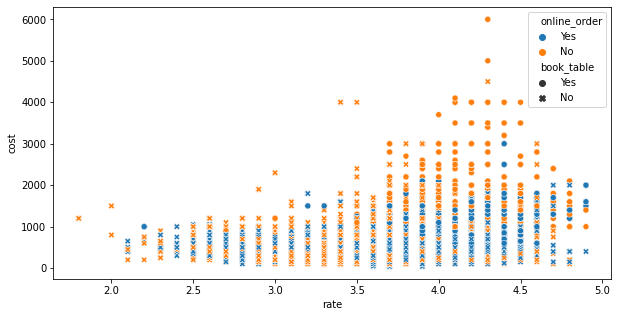

In [75]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="rate",y='cost',hue='online_order',data=df,style="book_table")
plt.show()

# Best Cheap Restaurants 

In [85]:
df[(df["cost"]<=100) & (df["rate"]>=4)].sort_values(by=["rate"],ascending=False)

name online_order book_table  rate  \
2666                 Brahmin's Coffee Bar           No         No   4.8   
547                          Taaza Thindi           No         No   4.7   
16959  Sri Laxmi Venkateshwara Coffee Bar           No         No   4.4   
556    Sri Laxmi Venkateshwara Coffee Bar           No         No   4.4   
2851   Sri Laxmi Venkateshwara Coffee Bar           No         No   4.4   
242                         South Kitchen          Yes         No   4.3   
2680                        South Kitchen          Yes         No   4.3   
12088                     The Sugar Fairy           No         No   4.3   
2424                        South Kitchen          Yes         No   4.3   
16054                         By 2 Coffee          Yes         No   4.3   
16396                       South Kitchen          Yes         No   4.3   
2301                          By 2 Coffee          Yes         No   4.3   
11956                     The Sugar Fairy           No         No   4.3   
20336                     The Sugar Fairy           No         No   4.3   
20480                     The Sugar Fairy           No         No   4.3   
680                         South Kitchen          Yes         No   4.3   
31920                         Holige Mane          Yes         No   4.3   
37072                         By 2 Coffee          Yes         No   4.3   
16785            Brahmin Tiffins & Coffee           No         No   4.2   
32005        Sri Sairam's Chats and Juice           No         No   4.2   
251                      Puliyogare Point          Yes         No   4.2   
37470                         Holige Mane          Yes         No   4.2   
18701            Brahmin Tiffins & Coffee           No         No   4.2   
15521                    Puliyogare Point          Yes         No   4.2   
2840             Brahmin Tiffins & Coffee           No         No   4.2   
2678                     Puliyogare Point          Yes         No   4.2   
663                      Puliyogare Point          Yes         No   4.2   
2040                     Puliyogare Point          Yes         No   4.2   
291                            Chai Kraft          Yes         No   4.1   
28498          Davangere Benna Dose Hotel          Yes         No   4.1   
17694                          Chai Kraft          Yes         No   4.1   
18029          Davangere Benna Dose Hotel          Yes         No   4.1   
2871                        Iyengar's Inn           No         No   4.1   
18948               Brahmins' Thatte Idli          Yes         No   4.1   
19942               Brahmins' Thatte Idli          Yes         No   4.1   
1097                         Dakshin Cafe          Yes         No   4.1   
682                 Mahalaxmi Tiffin Room           No         No   4.1   
28320                          Chai Kraft          Yes         No   4.1   
31424               Brahmins' Thatte Idli          Yes         No   4.1   
37261                    Amrith Ice Cream           No         No   4.1   
31514                         By 2 Coffee          Yes         No   4.1   
17623                        Dakshin Cafe          Yes         No   4.1   
39159                      Poha On Wheels          Yes         No   4.1   
37525                         Holige Mane          Yes         No   4.1   
31985                         Holige Mane          Yes         No   4.1   
605                       SLV Refreshment           No         No   4.1   
369                  Karnataka Bhel House          Yes         No   4.1   
37138                Karnataka Bhel House           No         No   4.1   
31850                    Amrith Ice Cream           No         No   4.1   
18461                        Dakshin Cafe          Yes         No   4.1   
3217                       Poha On Wheels          Yes         No   4.1   
16749                       Iyengar's Inn           No         No   4.1   
2380           Davangere Benna Dose Hotel          Yes        

# Best Average cost Restaurants

In [87]:
df[(df["cost"]<=df["cost"].mean()) & (df["rate"]>=4) ].sort_values(by=["rate"],ascending=False)

name online_order  \
38305                             Belgian Waffle Factory          Yes   
8183                              Belgian Waffle Factory          Yes   
4658                              Belgian Waffle Factory          Yes   
34279                             Belgian Waffle Factory          Yes   
11634                             Belgian Waffle Factory          Yes   
14567                                   Milano Ice Cream           No   
33746                             Belgian Waffle Factory          Yes   
9851                              Belgian Waffle Factory          Yes   
30020                             Belgian Waffle Factory          Yes   
30515                             Belgian Waffle Factory          Yes   
37844                             Belgian Waffle Factory          Yes   
14108                             Belgian Waffle Factory          Yes   
9354                              Belgian Waffle Factory          Yes   
4131                              Belgian Waffle Factory          Yes   
19421                             Belgian Waffle Factory          Yes   
23510                             Belgian Waffle Factory          Yes   
37453                                                CTR          Yes   
24419                             Belgian Waffle Factory          Yes   
7442                              Belgian Waffle Factory          Yes   
12124                             Belgian Waffle Factory          Yes   
19910                             Belgian Waffle Factory          Yes   
2666                                Brahmin's Coffee Bar           No   
28896                             Belgian Waffle Factory          Yes   
37192                                 O.G. Variar & Sons           No   
31875                                 O.G. Variar & Sons           No   
37080                                                CTR          Yes   
21189                             Belgian Waffle Factory          Yes   
20427                             Belgian Waffle Factory          Yes   
31513                             Belgian Waffle Factory          Yes   
28044                             Belgian Waffle Factory          Yes   
18938                             Belgian Waffle Factory          Yes   
25901                             Belgian Waffle Factory          Yes   
22236                             Belgian Waffle Factory          Yes   
15661                             Belgian Waffle Factory          Yes   
26663                             Belgian Waffle Factory          Yes   
22208                                       Kurtoskalacs           No   
13915                             Corner House Ice Cream          Yes   
547                                         Taaza Thindi           No   
35730                             Corner House Ice Cream          Yes   
36300                             Corner House Ice Cream          Yes   
6658                                     Lot Like Crepes          Yes   
8671                                     Lot Like Crepes          Yes   
31410                                                CTR          Yes   
31959                                                CTR          Yes   
7389                                     Lot Like Crepes          Yes   
14563                             Corner House Ice Cream          Yes   
25419                          The Hole in the Wall Cafe           No   
24751                                    Lot Like Crepes          Yes   
25437                                    Lot Like Crepes          Yes   
16708                           The Blue Wagon - Kitchen          Yes   
2623                                              Onesta          Yes   
25550                             Corner House Ice Cream          Yes   
2034                                              Onesta          Yes   
24709                          The Hole in the Wall Cafe           No   
2323                            The B

In [88]:
df["cost"].mean()

603.9612380536555

# Finding best Restaurants by Cost & Location

In [96]:
print(" Cost for 2 :")
res_cost=float(input(""))
print("Location : ")
res_loc=input("")
def top_rest(res_cost,res_loc):
    x=df[(df["cost"]<=res_cost) & (df["rate"]>=4) & (df["location"]==res_loc) ].sort_values(by=["rate"],ascending=False)
    return x
top_rest(res_cost,res_loc)


 Cost for 2 :
150
Location : 
HSR


name online_order book_table  rate  votes location  \
13522  Raghavendra Tiffin           No         No   4.4    222      HSR   
22889  Raghavendra Tiffin           No         No   4.4    228      HSR   
7246         Asha Tiffins          Yes         No   4.3    278      HSR   
12626        Asha Tiffins          Yes         No   4.3    278      HSR   
21118        Asha Tiffins          Yes         No   4.3    283      HSR   
23327        Asha Tiffins          Yes         No   4.3    286      HSR   
25633        Asha Tiffins          Yes         No   4.3    286      HSR   
27766        Asha Tiffins          Yes         No   4.3    287      HSR   
3529         Mumbai Kulfi          Yes         No   4.0     92      HSR   
6726         Shiv Shakthi          Yes         No   4.0    175      HSR   
12695        Shiv Shakthi          Yes         No   4.0    176      HSR   
12971        Mumbai Kulfi          Yes         No   4.0     92      HSR   
13310        Mumbai Kulfi          Yes         No   4.0     92      HSR   
21018        Shiv Shakthi          Yes         No   4.0    176      HSR   
39527        Mumbai Kulfi          Yes         No   4.0     92      HSR   

            rest_type                   cuisines   cost  \
13522     Quick Bites               South Indian  150.0   
22889     Quick Bites               South Indian  150.0   
7246      Quick Bites               South Indian  150.0   
12626     Quick Bites               South Indian  150.0   
21118     Quick Bites               South Indian  150.0   
23327     Quick Bites               South Indian  150.0   
25633     Quick Bites               South Indian  150.0   
27766     Quick Bites               South Indian  150.0   
3529   Dessert Parlor                  Ice Cream  100.0   
6726      Quick Bites  Street Food, North Indian  100.0   
12695     Quick Bites  Street Food, North Indian  100.0   
12971  Dessert Parlor                  Ice Cream  100.0   
13310  Dessert Parlor                  Ice Cream  100.0   
21018     Quick Bites  Street Food, North Indian  100.0   
39527  Dessert Parlor                  Ice Cream  100.0   

                                            reviews_list  \
13522  [('Rated 4.0', "RATED\n  Awesome place to have...   
22889  [('Rated 4.0', "RATED\n  Awesome place to have...   
7246   [('Rated 2.0', "RATED\n  Ordered after its 4+ ...   
12626  [('Rated 2.0', "RATED\n  Ordered after its 4+ ...   
21118  [('Rated 2.0', "RATED\n  Ordered after its 4+ ...   
23327  [('Rated 5.0', 'RATED\n  Been here a couple of...   
25633  [('Rated 5.0', 'RATED\n  Been here a couple of...   
27766  [('Rated 5.0', 'RATED\n  Been here a couple of...   
3529   [('Rated 4.0', 'RATED\n  went here on sunday e...   
6726   [('Rated 4.0', 'RATED\n  After along time ..th...   
12695  [('Rated 4.0', 'RATED\n  After along time ..th...   
12971  [('Rated 4.0', 'RATED\n  went here on sunday e...   
13310  [('Rated 4.0', 'RATED\n  went here on sunday e...   
21018  [('Rated 4.0', 'RATED\n  After along time ..th...   
39527  [('Rated 4.0', 'RATED\n  went here on sunday e...   

                                               menu_item      type  \
13522                                                 []  Dine-out   
22889                                                 []  Dine-out   
7246   ['2 Idli', '2 Vada', '2 Idli Vada', 'Masala Do...  Delivery   
12626                                                 []  Delivery   
21118  ['Gobi Manchurian Dry', 'Baby Corn Manchurian ...  Delivery   
23327  ['Gobi Manchurian Dry', 'Baby Corn Manchurian ...  Delivery   
25633                                                 []  Delivery   
27766  ['Gobi Manchurian Dry', 'Baby Corn Manchurian ...  Delivery   
3529                                                  []  Delivery   
6726                                                  []  Delivery   
12695                                                 []  Delivery   
12971                                                 []  Delivery   
1331